In [1]:
# pip install googlemaps
# pip install folium  # Make beautiful maps with Leaflet.js & Python

In [134]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [12]:
cctv = pd.read_csv('C:/Users/pc/Desktop/data/cctv.csv', encoding='utf-8')
cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [91]:
# change column name from 기관명 to 구별
# 1)
cctv.columns = ['region', 'total', 'before 2013', '2014', '2015', '2016']
# or 2)
cctv.rename(columns={cctv.columns[0]:'region'}, inplace = True)

cctv.head()

,region,total,before 2013,2014,2015,2016
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [92]:
pop = pd.read_excel('C:/Users/pc/Desktop/data/pop.xls', encoding='utf-8',
                   header = 2, usecols = 'B,D,G,J,N')
pop.drop([0],inplace=True)
type(pop)

pandas.core.frame.DataFrame

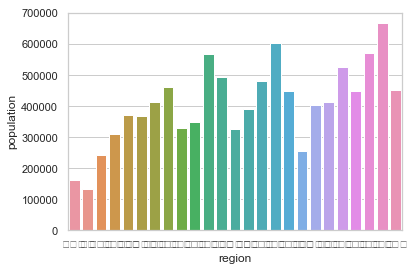

In [93]:
pop.columns = ['region','population','kor','for','old']
sns.barplot(x='region',y='population',data=pop)
sns.set()
sns.set_style('whitegrid')
plt.show()

In [97]:
cctv.sort_values(by='total', ascending=True).head()

,region,total,before 2013,2014,2015,2016
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [98]:
# null 확인

pop['region'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [99]:
# null 행번호 확인

pop[pop['region'].isnull()]

,region,population,kor,for,old
26,NaN,NaN,NaN,NaN,NaN


In [100]:
# drop null

pop.drop([26],inplace=True)

In [101]:
# find kor-for ratio

pop['for ratio'] = pop['for']/pop['population']*100
pop['old ratio'] = pop['old']/pop['population']*100

In [102]:
pop.sort_values(by='population').head()

,region,population,kor,for,old,for ratio,old ratio
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [111]:
cctv['increase rate']=(cctv['2014']+cctv['2015']+cctv['2016'])/cctv['before 2013']*100
cctv.sort_values(by='increase rate').head()

,region,total,before 2013,2014,2015,2016,increase rate
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266


In [122]:
df = pd.merge(cctv, pop, on='region')
df.head()

,region,total,before 2013,2014,2015,2016,increase rate,population,kor,for,old,for ratio,old ratio
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [131]:
df = df.drop(columns=['before 2013','2014','2015','2016'])

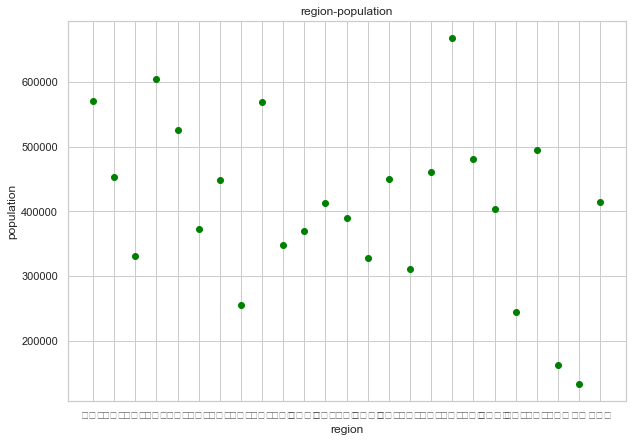

In [157]:
plt.figure(figsize=(10,7))
plt.scatter(x='region',y='population',data=df, color='green')
plt.xlabel('region')
plt.ylabel('population')
plt.title('region-population')
plt.show()

In [127]:
np.corrcoef(df['total'], df['old ratio'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [133]:
df.corr(method='pearson')

,total,increase rate,population,kor,for,old,for ratio,old ratio
total,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
increase rate,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
population,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
kor,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
for,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
old,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
for ratio,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
old ratio,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000
